<a href="https://colab.research.google.com/github/ehpub/ML-with-Python/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_with_python_008_%EC%84%A0%ED%98%95_%EB%AA%A8%EB%8D%B8%EB%A1%9C_%EB%B6%84%EB%A5%98_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/%ec%84%a0%ed%98%95-%eb%b6%84%eb%a5%98-%eb%aa%a8%eb%8d%b8-logisticregression-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d-with-%ed%8c%8c%ec%9d%b4%ec%8d%ac/)

## 로지스틱 회귀

모델 이름에 회귀가 들어있지만 분류 문제에 사용하는 분류 모델입니다.


In [5]:
from sklearn.linear_model import LogisticRegression #로지스틱 회귀
from sklearn.linear_model import LinearRegression #선형 회귀
from sklearn.datasets import load_iris #붓꽃 데이터 로드

from sklearn.model_selection import train_test_split #학습 및 테스트 데이터 분리
from sklearn.metrics import accuracy_score #적합도(분류)
from sklearn.model_selection import cross_val_score #교차 검증 점수

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

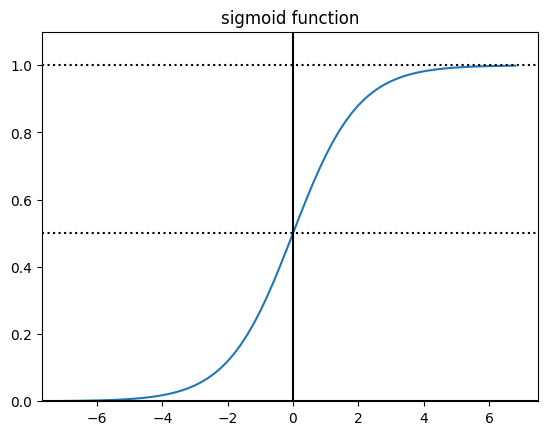

In [15]:
data = np.arange(-7,7,0.2)
target = [sigmoid(x) for x in data]
plt.plot(data,target)
plt.axvline(x=0,color='k')
plt.axhline(y=0,color='k')
plt.axhline(y=0.5,color='k',linestyle=':')
plt.axhline(y=1,color='k',linestyle=':')
plt.ylim(0,1.1)
plt.title("sigmoid function")
plt.show()

## 로지스틱 회귀 사용 예

In [16]:
iris = load_iris()
data = iris.data
target = iris.target

In [20]:
x_train,x_test, y_train,y_test = train_test_split(data,target)

In [21]:
model = LogisticRegression(max_iter=5000)
model.fit(x_train,y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("학습 데이터 적합도:",accuracy_score(y_train,pred_train))
print("테스트 데이터 적합도:",accuracy_score(y_test,pred_test))

학습 데이터 적합도: 0.9821428571428571
테스트 데이터 적합도: 0.8947368421052632


In [22]:
pred_testa = model.predict_proba(x_test)
print(y_test[0], np.round(pred_testa[0],4))

0 [0.9676 0.0324 0.    ]


## 선형 회귀 모델을 이용한 이진 분류기 만들기

In [ ]:
iris = load_iris()
data = iris.data
target = [1]*50+[0]*100

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(data,target)

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("학습 데이터 적합도:",accuracy_score(y_train,pred_train))
print("테스트 데이터 적합도:",accuracy_score(y_test,pred_test))

학습 데이터 적합도: 1.0
테스트 데이터 적합도: 1.0


In [ ]:
pred_test_proba = model.predict_proba(x_test)
print(y_test[0], np.round(pred_test_proba[0],4))

1 [0.0273 0.9727]


In [ ]:
class BinaryClassifier:
  def __init__(self):
    self.model = LinearRegression()
  def sigmoid(self,x):
    return 1/(1+np.exp(-x))
  def fit(self,x,y):
    y = np.array(y)
    y = (y*20)-10 #0은 -10, 1은 10으로 변환
    self.model.fit(x,y)
  def predict(self,x):
    re = self.model.predict(x)
    return (self.sigmoid(re)>=0.5).astype(int)
  def predict_proba(self,x):
    re1 = self.sigmoid(self.model.predict(x))
    re2 = 1- re1
    return np.stack([re2,re1],axis=1)

In [ ]:
model = BinaryClassifier()
model.fit(x_train,y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("학습 데이터 적합도:",accuracy_score(y_train,pred_train))
print("테스트 데이터 적합도:",accuracy_score(y_test,pred_test))

학습 데이터 적합도: 1.0
테스트 데이터 적합도: 1.0


In [ ]:
pred_test_proba = model.predict_proba(x_test)
print(y_test[0], np.round(pred_test_proba[0],4))

1 [0.0013 0.9987]


In [ ]:
def binary_cross_entropy(pred, y):
  return -(pred.log()*y + (1-y)*(1-pred).log()).mean()